In [158]:
# import numpy as np
# import sympy as sp 

# theta = sp.symbols('theta')

# state = sp.Array([ [1+sp.exp(-1.j*theta)],[1-sp.exp(-1.j*theta)] ])/2

# sp.Array(state @ np.array(state).conj().T)


In [159]:
# def rho(theta):
#     state = np.array([ [1+np.exp(-1.j*theta)],[1-np.exp(-1.j*theta)] ])/2
#     return state @ state.conj().T

# def rho_2(theta):
#     return np.array([ [2+np.exp(-1.j*theta)+np.exp(1.j*theta), np.exp(-1.j*theta)-np.exp(1.j*theta)], [-np.exp(-1.j*theta)+np.exp(1.j*theta), 2-(np.exp(-1.j*theta)+np.exp(1.j*theta) )]])/4

In [160]:
# theta = np.pi/4

# np.isclose( rho(theta), rho_2(theta))

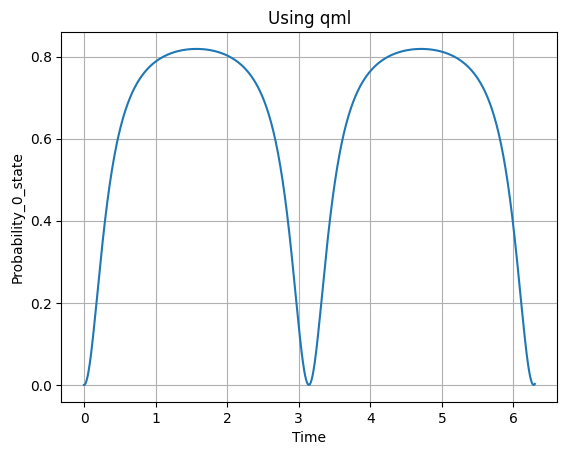

In [161]:
import pennylane as qml
from pennylane import numpy as np 

import matplotlib.pyplot as plt


gamma = 0
t = 0.05

def CFI(phi):
    return (-4 * (gamma-1) * np.exp(2 * t) * np.sin(phi)**2) / ((np.exp(2 * t)-np.cos(phi)**2)*(gamma * np.cos(phi)+(gamma-2) * np.exp(2 * t))**2)

#  == Plot for CFI ==
N = 1000
tau_CFI = np.linspace(-0.001, 6.3, N)

CFI_equ = np.zeros(N)

for i in range(len(tau_CFI)):
    # Casting to numpy array without gradient
    CFI_equ[i] = CFI(tau_CFI[i])


plt.subplot()
plt.plot(tau_CFI, CFI_equ)
plt.title('Using qml')
plt.xlabel('Time')
plt.ylabel('Probability_0_state')
# plt.legend()
plt.grid()

In [162]:
# Fixed variables of density matrix
gamma = 0.8
t = 2
# t = 0.677

# == Test function ==
Hadamard = np.array([ [1,1], [1,-1] ])/np.sqrt(2)

def rho_after_2nd(phi):
    rho = np.array([ [1, np.exp(1.j * phi - t)], [np.exp(-1.j * phi - t), 1] ]) / 2
    
    return Hadamard @ rho @ Hadamard.conj().T


# Same as rho_ps
def rho_after_kraus(rho):
    k = np.array([ [np.sqrt(1-gamma) ,0], [0, 1] ])
    
    rho_ps = (k @ rho @ k.conj().T) / (np.trace(k @ k.conj().T @ rho))
    
    return rho_ps

def classical_fisher_information(rho):
 

  tr = np.trace(rho)
  s = np.linalg.eigvalsh(rho)
  return (1 / tr) * np.sum((s / (s - 1))**2)

In [163]:
def func(n):
    
    result_1 = n+1
    result_2 = 2*n+1
    
    return result_1, result_2


func(2)[1]
    

5

In [164]:
rho = np.array([ [1, 1], [1, 1] ]) / 2

def get_state():
    
    eig_val, eig_vec = np.linalg.eig(rho)
    index = np.argmax(eig_val)
    
    eigen_vectors = eig_vec[:, index]

    return eigen_vectors 


get_state()

tensor([0.70710678, 0.70710678], requires_grad=True)

In [165]:
def rho(phi, t1, t2):
    rho = np.array([ [1, np.exp(1.j*phi - t1/t2)], [np.exp(-1.j*phi - t1/t2), 1] ])/2
    
    return rho


def rho_equ(phi, t):
    rho_equ = np.array([ [1 + np.cos(phi) * np.exp(-t), np.sin(phi) * -1.j*np.exp(-t) ], [np.sin(phi) * 1.j*np.exp(-t), 1 - np.cos(phi) * np.exp(-t)] ]) / 2
    
    return rho_equ

np.isclose((Hadamard @ rho(np.pi,  2, 1) @ Hadamard.conj().T), rho_equ(np.pi, 2))

tensor([[ True,  True],
        [ True,  True]], requires_grad=True)

In [166]:
# post-selected density matrix

def rho_ps(t1, t2, phi, gamma):
	density_matrix_ps = np.array([ [(gamma - 1)*(np.exp(t1/t2) + np.cos(np.phi)), 1.j * np.sqrt(1-gamma)*np.sin(phi)], [-1.j * np.sqrt(1-gamma)*np.sin(phi), np.cos(phi) - np.exp(t1/t2)] ]) / (gamma*np.cos(phi) + (gamma-2)*np.exp(t1/t2))
	
	return density_matrix_ps

rho_ps(1, 1, np.pi, 0.5)


AttributeError: module 'pennylane.numpy' has no attribute 'phi'